# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Read-in Data

In [2]:
subreddits = pd.read_csv('../data/subreddits_preprocessed.csv')

In [4]:
subreddits.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
subreddits.head(2)

,title,selftext,subreddit,author,num_comments,score,timestamp,original_text,post_length_char,post_length_words,is_unethical,lemma_text,stemmer_text
0,Answers to why,NaN,LifeProTips,AlienAgency,2,1,2020-07-17,Answers to why,15,3,0,answer to why,answer to whi
1,¿Quieres obtener juegos y premios gratis en tu...,NaN,LifeProTips,GarbageMiserable0x0,2,1,2020-07-17,¿Quieres obtener juegos y premios gratis en tu...,60,10,0,¿quieres obtener juegos y premios gratis en tu...,¿quier obten juego y premio grati en tu tiempo...


## Functions

In [40]:
def set_labels(title, xlabel, ylabel, title_size = 16, axis_size = 13):
    plt.title(title, fontdict = {'fontsize':title_size}, pad = 10)
    plt.xlabel(xlabel, fontdict = {'fontsize': axis_size})
    plt.ylabel(ylabel, fontdict = {'fontsize':13});

In [56]:
def create_v_barplot(df, feature, fig_size = (8,6)):
    plt.figure(figsize=fig_size)
    sns.boxplot(df[feature], orient = 'v')
    plt.tight_layout;

In [62]:
def create_hist(df, feature, num_bins=10):
    sns.distplot(df[feature], bins = num_bins)

## Compare Distributions of Numerical Data Between Subreddits

In [22]:
life_pro_tips = subreddits[subreddits['subreddit'] == 'LifeProTips']
unethical_life_pro_tips = subreddits[subreddits['subreddit'] == 'UnethicalLifeProTips']

### Number of Comments

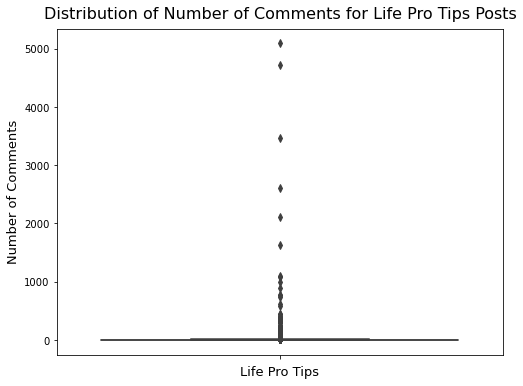

In [51]:
create_v_barplot(life_pro_tips, 'num_comments')
set_labels('Distribution of Number of Comments for Life Pro Tips Posts', 'Life Pro Tips', 'Number of Comments');

As shown in the boxplot above, the range of number of comments for Life Pro Tips posts, is highly spread out. The minimum number of comments is 0, and the maximum number of comments is 5091. The interquartile range is from 2 comments to 8 comments. Only 653 out of the 2678 posts have more than 8 comments. These 653 posts appear as outliers in the boxplot. However, because posts with more comments could be a distinguishing feature between the subreddits, all points outside of the interquartile range will be kept in the dataset.

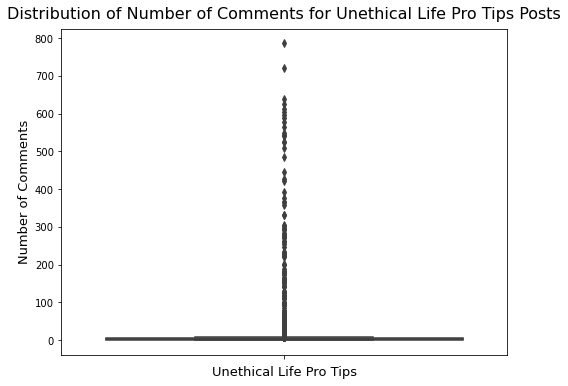

In [52]:
create_v_barplot(unethical_life_pro_tips, 'num_comments')
set_labels('Distribution of Number of Comments for Unethical Life Pro Tips Posts', 'Unethical Life Pro Tips', 'Number of Comments');

Similar to the number of comments for Life Pro Tips Posts, we see that the range for number of comments for posts in Unethical Life Pro Tips is also highly spread out. The minimum number of comments is 0, and the maximum number of comments is 786. For Unethical Life Pro Tips, 75% of the posts have 4 or less comments. Only 791 out of 3194 comments have comment counts than 4, and many of these posts appear as outliers on the boxplot. However, again, because the variation in comments could be an important feature for distinguishing between the two subreddits, all posts will remain in the dataset.

### Score

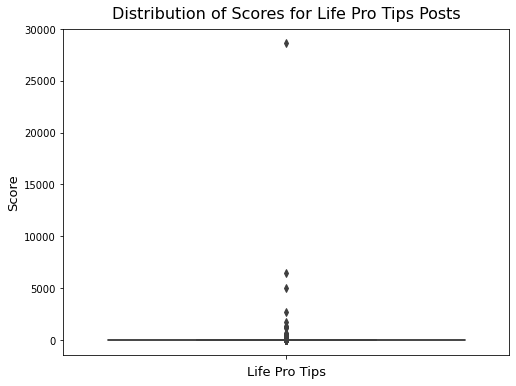

In [71]:
create_v_barplot(life_pro_tips, 'score')
set_labels('Distribution of Scores for Life Pro Tips Posts', 'Life Pro Tips', 'Score');

Similar to the distributions for number of comments, the range of scores for Life Pro Tips posts is also highly variable. The range is from 0 to 28606, with 75% of posts having a score of 1 or less. Only 432 out of 2678 posts have a score higher than 1. Likely the posts with a high score became very popular and were featured on the main Reddit page. Again, because these high scores could hold important information, they will not be dropped.

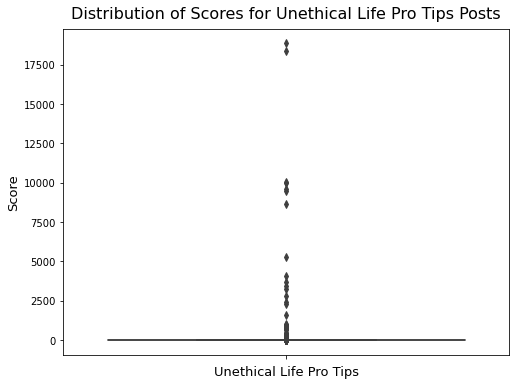

In [73]:
create_v_barplot(unethical_life_pro_tips, 'score')
set_labels('Distribution of Scores for Unethical Life Pro Tips Posts', 'Unethical Life Pro Tips', 'Score');

In [80]:
unethical_life_pro_tips['score'].describe()

count     3194.000000
mean        41.373826
std        627.155225
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      18861.000000
Name: score, dtype: float64

The scores for Unethical Life Pro Tips are highly variable. The min score is 0, and the max score is 18,861. 75% of all posts have a score of 1 or less, so many posts appear as outliers on this figure.

## Create 'Bag of Words' for EDA

In [7]:
corpus = subreddits['original_text']

In [17]:
cvec = CountVectorizer(stop_words = 'english', ngram_range = (1, 2), min_df = 5, max_df = 0.95)

In [18]:
words = cvec.fit_transform(corpus)

In [19]:
words_df = pd.DataFrame(words.toarray(), columns = cvec.get_feature_names())

In [20]:
words_df

,00,000,10,10 10,10 15,10 20,10 250,10 minutes,10 seconds,10 times,...,youtu,youtube,youtube com,youtube video,youtube videos,ysk,zero,zip,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5869,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
